# Dados dos Pilotos da Fórmula 1 de 1950 à 2024

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
# Conectando com todos os CSV
dfCircuitos = pd.read_csv("../../data/raw/DataBaseF1/circuits.csv")
dfConstrutoresResultado = pd.read_csv("../../data/raw/DataBaseF1/constructor_results.csv")
dfConstrutoresClassificacao = pd.read_csv("../../data/raw/DataBaseF1/constructor_standings.csv")
dfConstrutores = pd.read_csv("../../data/raw/DataBaseF1/constructors.csv")
dfPilotosClassificacao = pd.read_csv("../../data/raw/DataBaseF1/driver_standings.csv")
dfPilotos = pd.read_csv("../../data/raw/DataBaseF1/drivers.csv")
dfVoltas = pd.read_csv("../../data/raw/DataBaseF1/lap_times.csv")
dfPitStops = pd.read_csv("../../data/raw/DataBaseF1/pit_stops.csv")
dfQualificacao = pd.read_csv("../../data/raw/DataBaseF1/qualifying.csv")
dfCorridas = pd.read_csv("../../data/raw/DataBaseF1/races.csv")
dfResultadosCorrida = pd.read_csv("../../data/raw/DataBaseF1/results.csv")
dfTemporadas = pd.read_csv("../../data/raw/DataBaseF1/seasons.csv")
dfSprints = pd.read_csv("../../data/raw/DataBaseF1/sprint_results.csv")
dfStatus = pd.read_csv("../../data/raw/DataBaseF1/status.csv")


# Todos os Pilotos Brasileiros da Base de Dados

In [20]:
dfPilotosBrasileiros = dfPilotos[dfPilotos['nationality'] == 'Brazilian']
dfPilotosBrasileiros

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
11,12,piquet_jr,\N,PIQ,Nelson,Piquet Jr.,1985-07-25,Brazilian,"http://en.wikipedia.org/wiki/Nelson_Piquet,_Jr."
12,13,massa,19,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
21,22,barrichello,\N,BAR,Rubens,Barrichello,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello
40,41,zonta,\N,ZON,Ricardo,Zonta,1976-03-23,Brazilian,http://en.wikipedia.org/wiki/Ricardo_Zonta
41,42,pizzonia,\N,PIZ,Antônio,Pizzonia,1980-09-11,Brazilian,http://en.wikipedia.org/wiki/Ant%C3%B4nio_Pizz...
42,43,matta,\N,\N,Cristiano,da Matta,1973-09-19,Brazilian,http://en.wikipedia.org/wiki/Cristiano_da_Matta
53,54,burti,\N,\N,Luciano,Burti,1975-03-05,Brazilian,http://en.wikipedia.org/wiki/Luciano_Burti
57,58,marques,\N,\N,Tarso,Marques,1976-01-19,Brazilian,http://en.wikipedia.org/wiki/Tarso_Marques
58,59,bernoldi,\N,\N,Enrique,Bernoldi,1978-10-19,Brazilian,http://en.wikipedia.org/wiki/Enrique_Bernoldi
63,64,diniz,\N,\N,Pedro,Diniz,1970-05-22,Brazilian,http://en.wikipedia.org/wiki/Pedro_Diniz


# Pilotos Brasileiros com mais vitórias na Fórmula 1

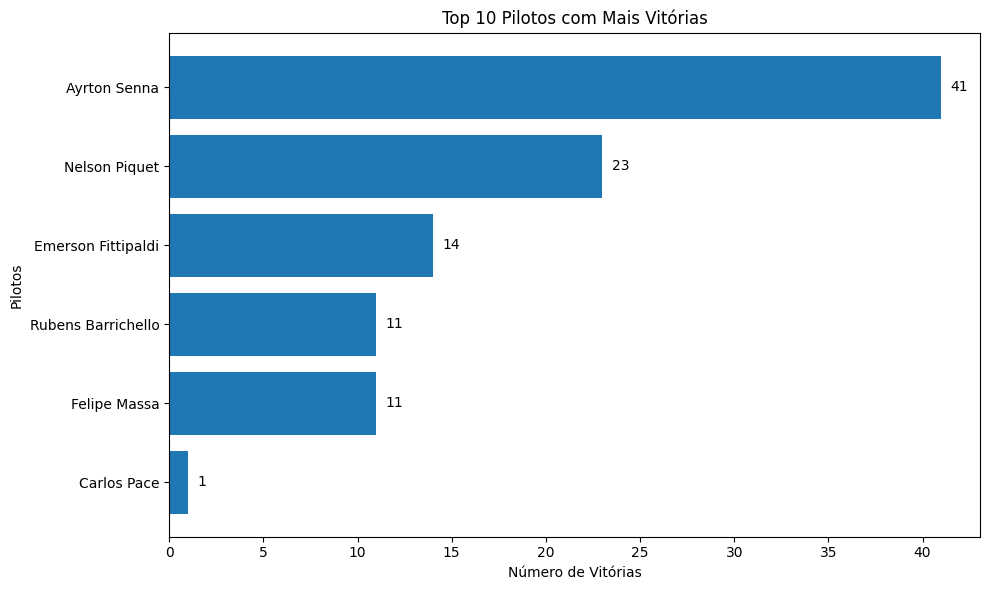

In [46]:
dfPilotosBrasileirosVitorias = dfResultadosCorrida[dfResultadosCorrida['positionOrder'] == 1]
dfPilotosBrasileirosVitorias = dfPilotosBrasileirosVitorias[dfPilotosBrasileirosVitorias['driverId'].isin(dfPilotosBrasileiros['driverId'])]
dfPilotosBrasileirosVitorias = dfPilotosBrasileirosVitorias.merge(dfPilotosBrasileiros[['driverId', 'forename', 'surname', 'dob']], on='driverId', how='left')
dfPilotosBrasileirosVitorias.rename(columns={'dob': 'Data de Nascimento', 'forename': 'Nome', 'surname': 'Sobrenome'}, inplace=True)
dfPilotosBrasileirosVitorias = dfPilotosBrasileirosVitorias.groupby(['driverId', 'Nome', 'Sobrenome', 'Data de Nascimento']).size().reset_index(name='Número de Vitórias').sort_values(by='Número de Vitórias', ascending=True)

#plot 
# plot - top 10 pilotos com mais vitórias
plt.figure(figsize=(10, 6))
plt.barh(
    dfPilotosBrasileirosVitorias['Nome'] + ' ' + dfPilotosBrasileirosVitorias['Sobrenome'],
    dfPilotosBrasileirosVitorias['Número de Vitórias']
)

# Adiciona os números no final das barras
for i, v in enumerate(dfPilotosBrasileirosVitorias['Número de Vitórias']):
    plt.text(
        v + 0.5,  # desloca um pouco pra frente da barra
        i,        # posição na vertical
        str(v),   # texto = número de vitórias
        va='center'
    )

plt.title('Top 10 Pilotos com Mais Vitórias')
plt.xlabel('Número de Vitórias')
plt.ylabel('Pilotos')
plt.tight_layout()
plt.show()
